<a href="https://colab.research.google.com/github/AstroStarTvn/white-wine-ML/blob/main/white_wine_quality_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The White Wine Classification Project

## Abstract

Machine learning models are taking over many tasks in various industries. One industry that could benefit from these models is the wine industry. Several physicochemical and sensory tests are performed on the wine samples to ensure the quality of the wines being produced. This project trains many machine learning models in a combination of different preprocessing techniques on the Vinho Verde white wine dataset, the product of the Mihno region in Portugal, to predict the quality of wine samples based on their physicochemical properties. Among many models trained on the white wine dataset, the Extra Trees Classifier was found to outperform other models in various test settings. Ultimately, a stacked model with an automatic feature selection comprising the Extra Trees Classifier, Random Forest Classifier, Extreme Gradient Boosting, Light Gradient Boosting Machine, and Decision Tree Classifier was found to be the best model after performing several optimization techniques. With the promising performance metrics achieved in this project, the subjective quality rating of wine samples by traditional reviewers can be replaced by machine learning models in the hope of a more rigorous wine quality rating in the near future.

# Introduction

This notebook is concerned with the design of a Machine Learning (ML) model to classify the quality of a set of white wines (Vinho Verde), produced in Purtugal, based on their physicochemical properties, as part of the requirements of the Selected Topics in Computer Engineering, Machine Learning, course.

Machine learning (ML) is the science of devising new techniques and algorithms to make computers and digital machines learn from experience and perform better in certain tasks. The learning process is highly dependent on the experience the machine is exposed to, as well as its correlation to the desired task to be performed by the machine. The experience takes different shapes in different categories of machine learning. In general, machine learning algorithms are broken down into there main categories: 1. Supervised Learning, 2. Unsupervised Learning, and 3. Reinforcement Learning. It should be noted that these categories can be extended further to incorporate the algorithms in the border of the main categories for special treatment; however, we stick to the main categories for the purpose of this project.

Supervised learning is one of the most employed techniques in the machine learning realm due to its capabilities in learning from labeled datasets. The name supervised is owed to the fact that the labels of the data are provided by a supervisor, which could be a human or a machine, to the algorithms as a guidance toward learning. In this context, dataset either is collected beforehand or can be obtained online during the training. Each dataset consists of a number of samples placed in the rows of the dataset, where each sample is represented with a vector of features, including the label (target), in the columns of the dataset. The algorithms in supervised learning take in the feature vector of each sample as an input to the system and optimize a cost function defined based on a loss function according to the performance objectives expected from the ML model. To this end, the ML model learns from iterating through the samples and improving its performance by maximizing its prediction performance according to the samples labels. After the optimization (learning) is finalized, the ML model is trained to predict the label of unseen samples based on their feature vectors. Supervised learning has two main categories: 1. Classification and 2. Regression. Classification is concerned with learning from and predicting categorical (discrete) labels of a dataset, while regression is concerned with learning from and predicting numerical (continuous) labels of a dataset.

On the other hand, unsupervised learning does not require the lables of the samples in a dataset since it is more concerned with dividing the given samples into certain categories based on their feature vectors. In this context, learning takes place by evaluating a measure of similarity of the samples' feature vectors and placing them into corresponding categories. Therefore, the existence of labels, and hence a supervisor, will not be required anymore, resulting in the name unsupervised. The main categories of the unsupervised learning algorithms are 1. Clustering and 2. Dimensionality Reduction. Clustering consists of algorithms that perform the categorizing tasks based on the input features, whereas dimensionality reduction is the set of algorithms utilized to categorize similar or not-useful features of given samples into a smaller number of features, resulting in reducing the dimension (feature) of a dataset.

Ultimately, reinforcement learning can be defined differenty due to its approach toward learning. The learner in reinforcement learning is called an agent that interacts with its envirement, which is outside of its control. State and action spaces are defined for each agent that represent the states of the agent and the actions available to it at each time instant, respectively. It is through taking actions in each state and the resulting interactions with the environment because of those actions that the agent learns how to perform better in its assigned task. The interactions with the environment are defined in terms of the rewards or penalties provided to the agent as the consequence of its action in the corresponding state. Usually, no dataset is required in this context as the agent moves in and interacts with the environment in real time.

# Literature Review

Many industries in the world have started employing machine learning techniques in their respective professions to take over some tasks that could be performed more effectively, faster, and less expensive by ML models. The wine industry has not been excepted from this trend. ML models have been used in recent years to predict a variety of components influencing the wine industry, such as the geographical wine origins based on the wine properties [1], the Californian wine classification given its chemical properties [2], the categories of rice wines using spectral measurements [3], and the classification of the Chilean wine [4].

One task that could benefit from ML models in the wine industry is wine certification based on the physicochemical and sensory tests [5]. The physicochemical tests are performed on wines in laboratories to measure the physicochemical properties of each wine, such as alcohol, pH, acidity, etc. In contrast, sensory tests are performed by humans to determine the quality of the wine based on its taste and human-related qualities. Unfortunately, the relationship between the sensory and physicochemical properties is complicated and has not been established yet [6]. Therefore, this could be an interesting point for introducing ML models to understand this complex relationship.

The physicochemical and sensory relationship has been addressed in recent years using ML models. The *Vinho Verde* wine dataset [7], a product of Portuguese Mihno wineries, has been studied by different researchers to predict the quality of red and white wines given their physicochemical properties. This dataset was initially used by Cortez *et al.* [6]. The *Vinho Verde* wine dataset contains 1599 red wine samples and 4898 white wine samples, with 11 physicochemical properties:  

1.   Fixed Acidity
2.   Volatile Acidity
3.   Citric Acid
4.   Residual Sugar
5.   Chlorides
6.   Free Sulfur Dioxide
7.   Total Sulfur Dioxide
8.   Density
9.   ph
10. Sulphates
11. Alcohol


The wine samples are labeled in 11 quality classes from 0 - 10. Although 11 quality classes were considered initially, the classes 0, 1, 2, and 10 are completely empty, which makes the out of the discussion in this project similar to previous works. The remaining quality classes can be categorized as 3-4, 5-7, and 8-9 into low, normal, and high quality wine, respectively. A huge problem with this dataset is the non-existence (or rare) of samples for low and high classes, where some of these classes are empty. This issue brings about the challenges of imbalanced datasets addressed in the machine learning research areas.  

Cortez *et al.* [6] utilized a feed-forward Neural Network (NN), Support Vector Machine (SVM), and Multiple Regression (MR) to predict the quality (sensory) of wines based on the analytical data obtained in the certification process. In the data mining process, they performed a sensitivity analysis to select the most contributing properties in parallel to the model selection process. They approached the classification objective in terms of a regression task, i.e., the quality labels (e.g., 3, 4, 5, ...) were considered continuous and predicted using regression algorithms. Consequently, the predicted values were placed in the closest original category according to a pre-defined threshold. For instance, a predicted value of 3.8 would be placed in the quality class 4 given a threshold of 0.5 for the difference between the predicted value and the adjacent classes. This approach resulted in using 9 physicochemical properties (features) on average using various ML models, where the SVM model performed the best with the classification accuracy of 89% and 86% for the red and white wines, respectively, given the threshold of 1.

On the other hand, Gupta *et al.* [8] proposed to utilize linear regression to determine the dependency between each feature and the wine quality (label) in order to lower the variance and make more accurate predictions. As a result of this process, they dropped 5 features for red wine samples and 3 features for white wine samples. The dropped white wine features were citric acid, chlorides, and total sulfur dioxide. Subsequently, they utilized a Neural Network (NN) and Support Vector Machine (SVM) to predict wine qualities. Similar to Cortez *et al.* [6], Gupta *et al.* [8] approached the quality classes as a regression label, which resulted in SVM being the best model, with the accuracy varying between 85% and 90% for different model configurations.

Moreover, Hu *et al.* [9] approached the wine dataset in terms of the classification of the wine qualities into three classes: high, normal, and poor qualities. In that regard, 3-4, 5-7, and 8-9 classes were assigned to low, normal, and high quality classes, respectively. It should be noted that classes 0, 1, 2, and 10 are completely empty; hence, they are kept out of the analysis as there is no way to learn about them. This resulted in 93% of the data being allocated to only one class (normal quality), from 4898 total samples, 4535 samples in normal class, and 363 samples for the low and high classes, which incurs the issues of an imbalanced dataset. To overcome such issues, they utilized the Synthetic Minority Over-sampling Technique (SMOTE) [9], as a solution to balance the dataset. The general idea behind SMOTE is to re-sample the dataset to generate more data for the rare classes as a way to eliminate the imbalance of the dataset and maintain the original distribution. After applying the SMOTE algorithm to the dataset, the number of samples in the normal and rare classes became 2178 and 2541. Afterward, three candidate ML models, Decision Tree (DT), Adaptive Boosting (AdaBoost), and Random Forest (RF), were used to predict the quality classes, i.e., low, normal, and high qualities, where the RF model outperformed the other models with the accuracy of 95% and the Receiver-Operating-Curve (ROC) value of 0.99.

#Project Roadmap

We will leverage the results of previous works to design a roadmap for addressing the quality classification of the white wine dataset as assigned. As opposed to the previous works that did not approach the wine quality prediction problem as the classification of the given quality classes, we take the quality classes as categories rather than numbers; however, we take into account in our analysis that the quality classes with nearby values are similar to each other. This actually makes sense since two wine samples with quality classes of 4 and 5 are more similar in their qualities rather than wine samples with quality classes of 4 and 9.

The first step is to present the dataset and evaluate different properties of the features with respect to each other, such as correlation, scale, distribution, etc. Afterward, the necessary preprocessing techniques will be applied to the dataset depending on the dataset properties to prepare the data for being fed to learning algorithms. In the first step of training, we feed the plain training set with the given number of samples to the *pycaret*'s compare_model() function to train different models on the training set. Then, given the models' performances, we will decide to whether or not use oversampling techniques to overcome the imbalanced dataset issues. Apart from that, Cortez *et al* [6] and Gupta *et al* [8] have suggested that eliminating some of the features would improve the model's performance in general. Therefore, we will examine the influence of feature selection on the model's performance by employing both the feature selection capability of the compare_model() function and the recommendations of Gupta *et al* [8]. Ultimately, the results of all the above steps will be analyzed using the appropriate metrics, the best model will be selected, tuned, and then used as an input to generate ensemble and blended models for a chance of improved performance.

# White Wine *Vinho Verde* Dataset

In this section, the white wine dataset is reviewed to gain a deeper understanding of the features, data distributions, scales, etc. First, we need to acquire the dataset from the University of California at Irvine website using the **!wget** command as  

In [2]:
!wget -q https://archive.ics.uci.edu/static/public/186/wine+quality.zip

As can be seen in the file directory, the wine dataset has been added to the directory as a zip file. To unzip the dataset, we use

In [3]:
!unzip -q wine+quality.zip

This would generate multiple files, where the file of interest, **winequality-white.csv** is one of them. The nest step would be to import the necessary modules for handling and presenting the data. One of the modules that we will use is **pycaret** which needs to be installed first. This can be done by

In [4]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 83.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 22.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 13.5 M

Now the necessary modules can be imported as

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycaret.classification import *

Using **pandas** module, we can read and show the white wine dataset as

In [2]:
wine_df = pd.read_csv('winequality-white.csv', delimiter=';')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


The first 5 entries of the dataset have been shown in the table above. Based on the problem definition, the first 11 columns represent the features of the dataset and the last column (quality) represents the label (target) of the dataset. To get an understanding of the details of the dataset, the **info()** function is used.

In [ ]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


As we can see above, there is no null values within the dataset, making any use of imputation methods unnecessary. It can be seen that all the features are numeric, including the quality column. Since we are addressing this problem as a classification problem with labels being as categories, we need to do a transformation to change the type of quality column from **int64** to **category**. That is achieved by

In [3]:
wine_df_categ_quality = wine_df.copy()
wine_df_categ_quality['quality'] = wine_df_categ_quality['quality'].astype('category')
wine_df_categ_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         4898 non-null   float64 
 1   volatile acidity      4898 non-null   float64 
 2   citric acid           4898 non-null   float64 
 3   residual sugar        4898 non-null   float64 
 4   chlorides             4898 non-null   float64 
 5   free sulfur dioxide   4898 non-null   float64 
 6   total sulfur dioxide  4898 non-null   float64 
 7   density               4898 non-null   float64 
 8   pH                    4898 non-null   float64 
 9   sulphates             4898 non-null   float64 
 10  alcohol               4898 non-null   float64 
 11  quality               4898 non-null   category
dtypes: category(1), float64(11)
memory usage: 426.2 KB


As seen above, the type of the quality column has changed to **category**, making the dataset a classification problem in the eyes of the machine learning models. A quick peek into the dataset can be done by

In [ ]:
wine_df_categ_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


Next step would be to figure out how many samples there are in the dataset in each quality class. Than can be seen in the list and figure below.

In [ ]:
quality_nums = wine_df['quality'].value_counts()
quality_nums

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

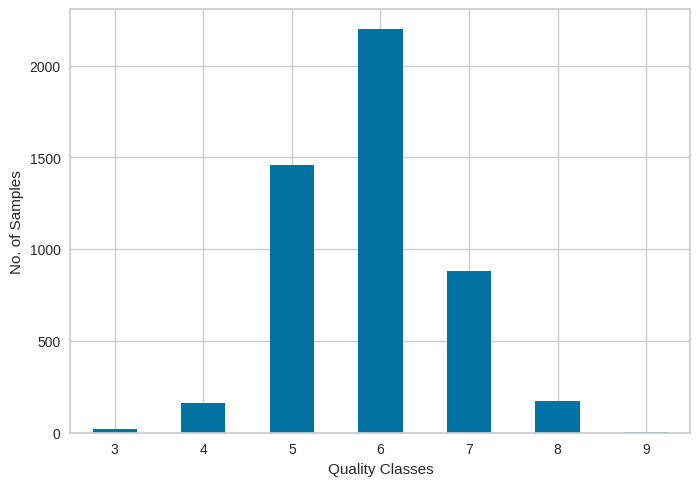

In [ ]:
quality_nums = wine_df['quality'].value_counts().sort_index().plot.bar(rot=0,
                                                                       grid=True,
                                                                       xlabel='Quality Classes',
                                                                       ylabel='No. of Samples',
                                                                       )

As seen above, the normal quality class, i.e., 5, 6, and 7, has the most of the samples as opposed to the low and high quality classes. We can see that out of 4898 data entries, 4535 of the samples are from quality classes 5, 6, and 7, while only 363 samples are from the rest of the classes. As the figure above shows, the classes 3 and 9 have 20 and 5 samples, respectively, which makes it challenging to design an ML model for the dataset due to imbalance within the quality classes. Next, we are interested to see the distribution of each feature given the number of samples. So we would write

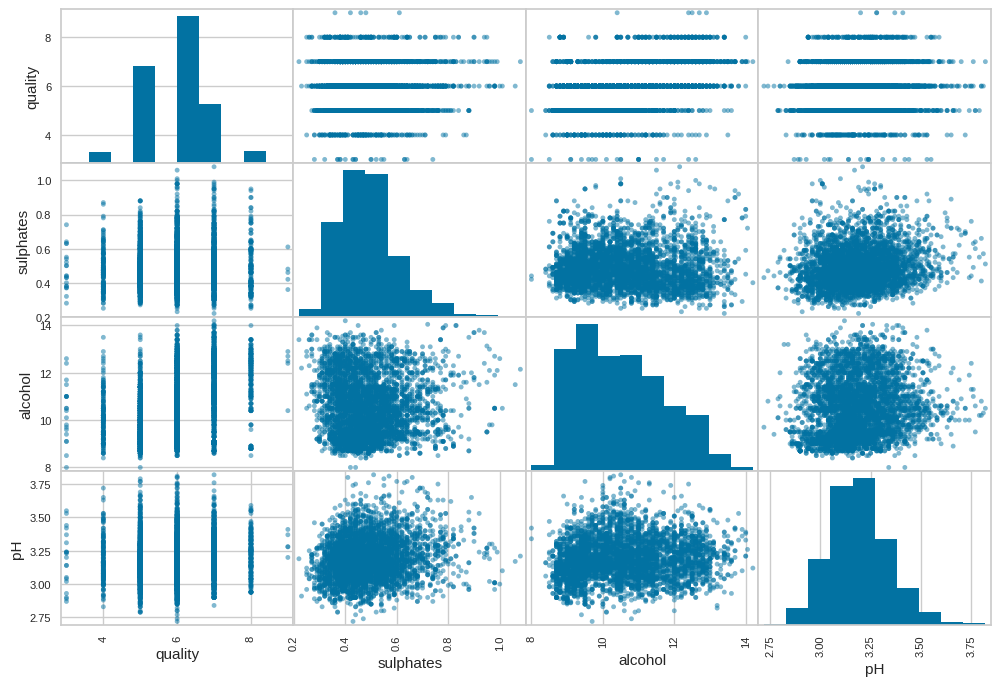

In [ ]:
# Ploting the scatter matrix
from pandas.plotting import scatter_matrix
scatter_matrix(wine_df[['quality','sulphates', 'alcohol', 'pH']],
               figsize=(12,8))
plt.show()

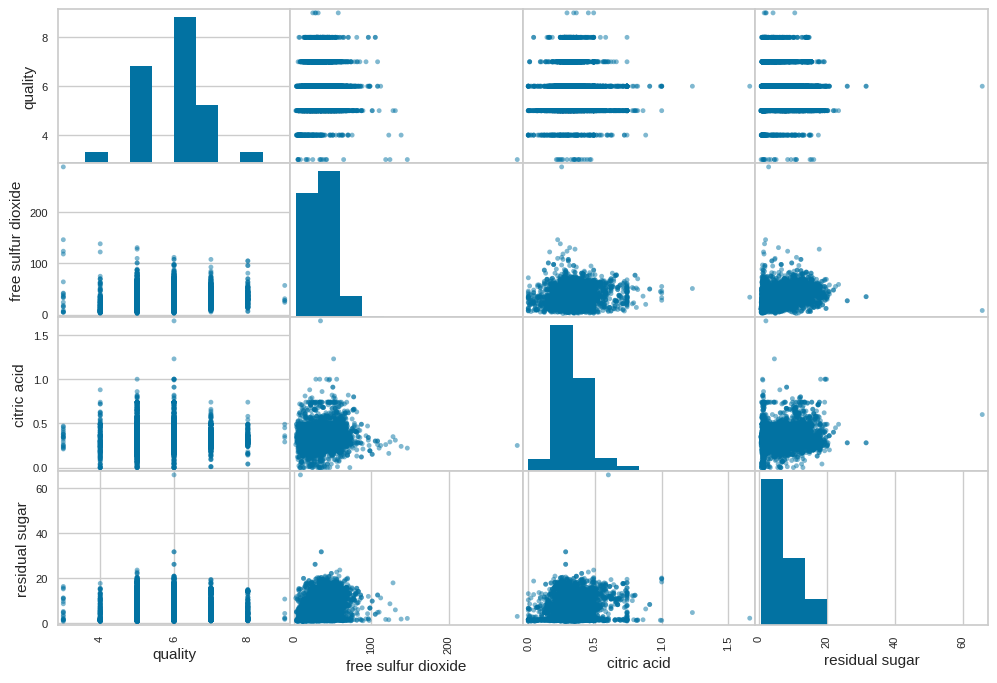

In [ ]:
scatter_matrix(wine_df[['quality','free sulfur dioxide', 'citric acid', 'residual sugar']],
               figsize=(12,8))
plt.show()

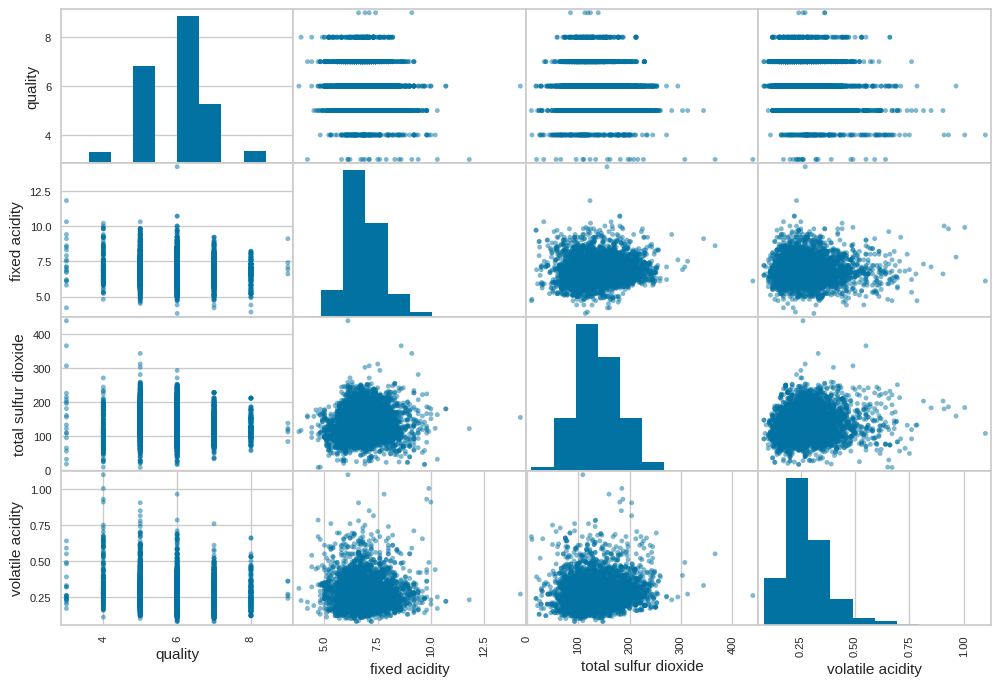

In [ ]:
scatter_matrix(wine_df[['quality','fixed acidity', 'total sulfur dioxide', 'volatile acidity']],
               figsize=(12,8))
plt.show()

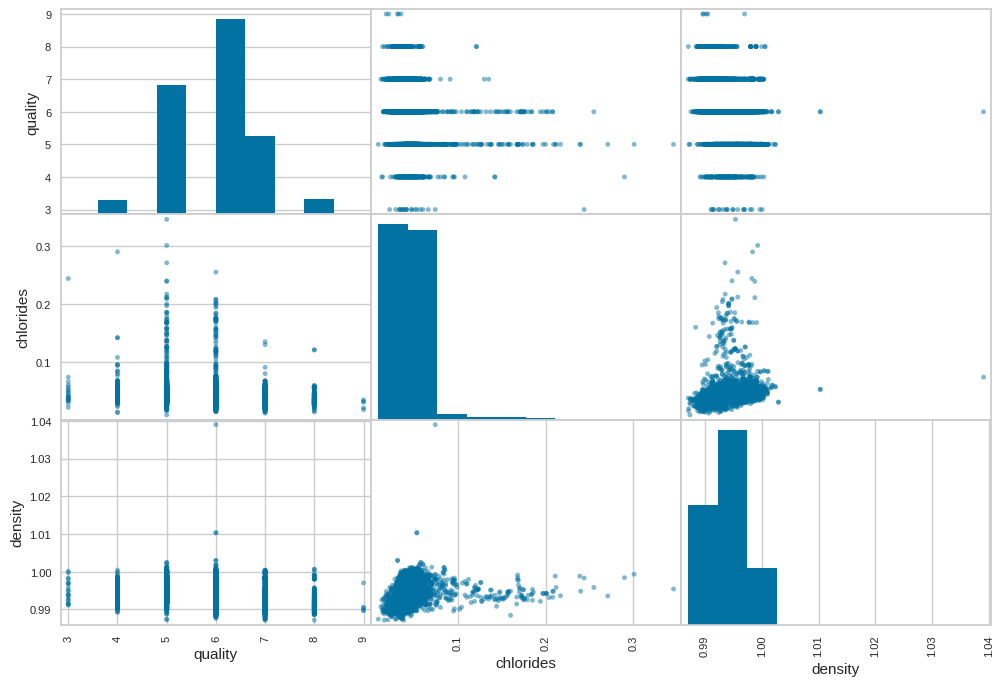

In [ ]:
scatter_matrix(wine_df[['quality','chlorides', 'density']],
               figsize=(12,8))
plt.show()

Since the quality classes are discrete, the feature distributions with respect to the quality column is discrete and similar to a histogram plot. By evaluating the corresponding plots presented above, no useful information can be interpreted since we can see that the samples from each class are similarly distributed over the feature spaces. Therefore, we cannot interpret which feature plays the most important role in classifying the samples into their corresponding quality class. To get an idea of the contribution of each feature to the classification task, we use the **corr()** function to evaluate the correlation between the features and the target classes. This can be achieved by

In [ ]:
correlation_matrix = wine_df.corr()
correlation_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

By evaluating the above list, we can see that the alcohol of a wine sample has the most correlation with the quality of that sample according to tasting measures by reviewers. As seen in the list above, pH and sulphates are next with an oreder of magnitude less correlation. On the other side of the spectrum, we can see that density , chlorides, and volatile acidity has the most inverese correlations with the quality of a wine sample, respectively. Comparing this result with what Gupta *et al* [8] has suggested, we can see that citric acid and free sulfur dioxide are the same based on the dependency of the quality classes on these physicochemical properties. Hence, considering that Cortez *et al* [6] has suggested an average of 9 features used in the training and predicting sections, the citric acid and free sulfur dioxide could be good candidates to be eliminated for preformance analysis of the resulting ML models.

As potential search directions in our work, we consider four kinds of feature selections; 1. training a model using all features, 2. training a model using 9 features selected by **pycaret** algorithms, and 3. training a model ignoring the features suggested by Gupta *et al*. These search directions can give us an insight into the contribution of each feature in a better model performance.

As reviewed before, there is no null values in the dataset, resulting in no imputation processes required. In addition, since all the feature values are numerical, and there is no categorical feature in the dataset, except the target column, no ordinal encoding or one-hot encoding would be needed. The last thing we should evaluate in the dataset is the scales of the feature values. To this end, we take a look at the statistical information of the dataset by

In [ ]:
wine_df_categ_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


As seen in the table above, most of the features are in similar scales, except free sulfur dioxide, total sulfur dioxide, and a bit less the residual sugar. Therefore, another search direction in model selection process would be training ML models with the normalization of the dataset to see whether it improves the model performance or not.

# Train and Select Models

In this section, we will follow our model search guidelines obtained in the previous sections to train various models using different preprocessings to obtain a model with the highest performance in predicting the quality class for a wine sample. Eventually, the model with the best performance will be selected and tuned to give the best performance possible by searching through its hyperparameters values.

Fortunately, the **pycaret** module trains many models on a given preprocessed dataset simultaneously, using the **compare_models()** method. There are a few preprocessing steps required to prepare the data for the training stage. First of all, we need to split the data between the training set and test set. Training set will contain the data used for training a model, while the test set will be left intact until the best model has been found, and the generalization error of the model needs to be analyzed given a new set of data which has never been seen by the model in the training stage. In addition, this split should maintain the data distribution with respect to each quality class; therefore, stratification methods should be used as well to generate a stratified set for both the training and test sets. Moreover, cross validation would be necessary in the training process of a model, where the training set will be divided into n folds, and a model will be trained n times, where each time one fold stays out of the training and the resulted model will be evaluated against that fold. Ultimately, the statistical results of the model's preformance will be reported afterward. Fortunately, the **setup()** method in the **pycaret** module takes care of all these preprocessing steps automatically. It is noteworthy that the **setup()** function assigns each quality class to its internal class which starts at **0** and increases sequentially until all classes are numbered. Consequently, the quality classes 3, 4, 5, 6, 7, 8, and 9 are represented by new labels as 0, 1, 2, 3, 4, 5, and 6, respectively.

Now it is time to train the available models based on the plain white wine dataset without addressing any imbalance issues. To this end, we apply the necessary preprocessing steps by

In [ ]:
clf1 = setup(data=wine_df_categ_quality, target='quality', session_id=333)

,Description,Value
0,Session id,111
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original data shape,"(4898, 12)"
5,Transformed data shape,"(4898, 12)"
6,Transformed train set shape,"(3428, 12)"
7,Transformed test set shape,"(1470, 12)"
8,Numeric features,11
9,Preprocess,True


In [ ]:
best1 = clf1.compare_models(exclude=['catboost', 'gbc'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6599,0.3398,0.6599,0.6669,0.6455,0.4681,0.4751,0.8800
et,Extra Trees Classifier,0.6564,0.3419,0.6564,0.6640,0.6422,0.4606,0.4691,0.7470
lightgbm,Light Gradient Boosting Machine,0.6470,0.3311,0.6470,0.6497,0.6368,0.4545,0.4585,4.8880
xgboost,Extreme Gradient Boosting,0.6453,0.3301,0.6453,0.6471,0.6365,0.4528,0.4568,0.7140
dt,Decision Tree Classifier,0.5753,0.2787,0.5753,0.5787,0.5754,0.3743,0.3749,0.0930
lda,Linear Discriminant Analysis,0.5303,0.2847,0.5303,0.5083,0.5030,0.2499,0.2599,0.0880
lr,Logistic Regression,0.5216,0.2789,0.5216,0.4814,0.4752,0.2139,0.2302,1.5740
ridge,Ridge Classifier,0.5198,0.0000,0.5198,0.4672,0.4476,0.1938,0.2192,0.0830
qda,Quadratic Discriminant Analysis,0.4720,0.2783,0.4720,0.4941,0.4616,0.2566,0.2669,0.0410
knn,K Neighbors Classifier,0.4705,0.2639,0.4705,0.4569,0.4554,0.1790,0.1810,0.1210


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

As seen in the table above, the best model is **Random Forest Classifier** having a low performance comparing to what a good classifier would look like in terms of the corresponding metrics such as accuracy, precision, recall, and area under the curve.

To leverage from our literature review, in the next step, we will eliminate the features suggested by Gupta *et al* [8] to see if any improvement is achieved. To this end, we prepare the dataset by doing the necessary preprocessings and eliminating the suggested features, i.e., citric acid, total sulfur dioxide, and chlorides, by

---



In [ ]:
clf2 = setup(data=wine_df_categ_quality, target='quality', ignore_features=['citric acid', 'total sulfur dioxide', 'chlorides'], session_id=333)

,Description,Value
0,Session id,222
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original data shape,"(4898, 12)"
5,Transformed data shape,"(4898, 9)"
6,Transformed train set shape,"(3428, 9)"
7,Transformed test set shape,"(1470, 9)"
8,Ignore features,3
9,Numeric features,8


In [ ]:
best2 = clf2.compare_models(exclude=['catboost', 'gbc'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6771,0.3355,0.6771,0.6821,0.6637,0.4959,0.5035,0.3050
rf,Random Forest Classifier,0.6677,0.3321,0.6677,0.6773,0.6537,0.4812,0.4878,0.4650
lightgbm,Light Gradient Boosting Machine,0.6435,0.3185,0.6435,0.6448,0.6337,0.4512,0.4550,3.0250
xgboost,Extreme Gradient Boosting,0.6342,0.3199,0.6342,0.6315,0.6257,0.4397,0.4425,0.5840
dt,Decision Tree Classifier,0.5811,0.2728,0.5811,0.5842,0.5808,0.3834,0.3841,0.0720
lr,Logistic Regression,0.5283,0.2780,0.5283,0.4931,0.4803,0.2243,0.2417,1.2620
lda,Linear Discriminant Analysis,0.5280,0.2821,0.5280,0.5089,0.5025,0.2474,0.2577,0.0290
ridge,Ridge Classifier,0.5225,0.0000,0.5225,0.4589,0.4501,0.1970,0.2237,0.0450
qda,Quadratic Discriminant Analysis,0.5000,0.2802,0.5000,0.4924,0.4891,0.2570,0.2592,0.0310
knn,K Neighbors Classifier,0.4825,0.2682,0.4825,0.4754,0.4716,0.2060,0.2077,0.0860


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

It can be seen from the table above that the best model turns out to be **Extra Tree Classifier** with a 2% increase in the classifier performance comparing to the first case where there was no feature selection. We can conclude that the feature selection suggested by Gupta *et al* [8] can improve the model performance slightly. However, the resulted performances for both cases are not desirable because they have an accuracy, precision, and recall scores of less than 70%. A look into the corresponding confusion matrix of the resulted model **best2** can give us some information about the source of the low performance, although we may have our own suspicions due to our understanding of the dataset. The confusion matrix for the **best2** model can be obtained by

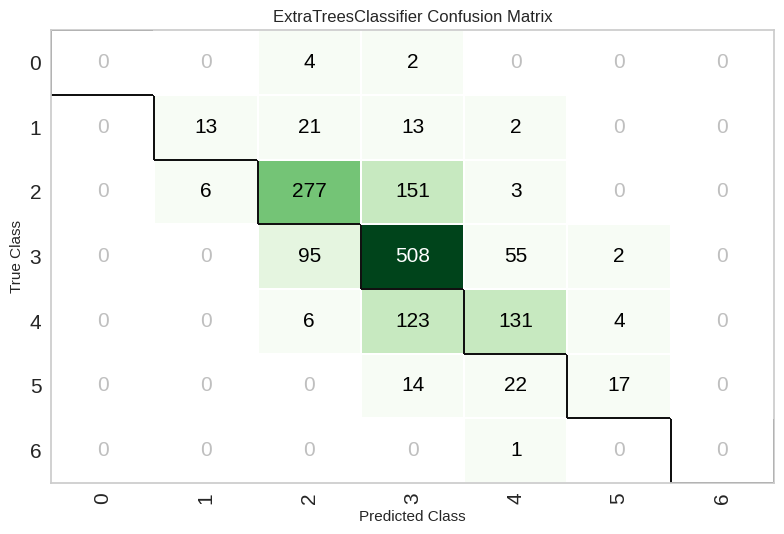

In [ ]:
clf2.plot_model(best2, plot='confusion_matrix')

The confusion matrix shown above is generated using the hold-out set (test set). As can be seen in the matrix, the model was not able to predict any of the wine samples from the quality classes 3 and 9 correctly, and most of the predictions are centered around the quality classes 5, 6, and 7 (normal quality class) which has the majority of the samples in the dataset, and the best prediction happened for the quality class 5 which has the most number of samples. This observation demonstrates the severity of imbalance issues in the dataset; therefore, it requires us to address the imbalance of the dataset. To this end, we will employ the Synthetic Minority Over-sampling Technique (SMOTE) to alleviate the situation. This can be done through the **SMOTE** class in the **Imbalance Learning** module as

In [4]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=4, n_jobs=-1)
X = wine_df_categ_quality.drop('quality', axis=1)
y = wine_df_categ_quality['quality']
X_smoted, y_smoted = smote.fit_resample(X, y)
y_smoted_df = pd.DataFrame(y_smoted, columns=['quality'])
wine_df_smoted = pd.concat([X_smoted, y_smoted_df], axis=1)

We can now evaluate the dataset after applying the SMOTE technique to the original dataset.

In [ ]:
wine_df_smoted.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
wine_df_smoted.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,15386.000000,15386.000000,15386.000000,15386.000000,15386.000000,15386.000000,15386.000000,15386.000000,15386.000000,15386.000000,15386.000000
mean,7.052318,0.301577,0.336468,5.712035,0.043817,34.383431,134.474258,0.993527,3.208702,0.482045,10.860162
std,0.942130,0.107154,0.103646,4.439962,0.023314,23.572108,50.708727,0.002885,0.141802,0.104167,1.291837
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.480923,0.235911,0.279721,1.952277,0.032458,21.489534,104.000000,0.991154,3.110000,0.410000,9.737478
50%,6.955277,0.280000,0.330000,4.239931,0.039568,30.753421,125.000000,0.993140,3.212002,0.466935,10.800000
75%,7.500000,0.342643,0.392945,8.484803,0.049000,42.636480,162.000000,0.995648,3.306700,0.540000,12.003927
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


In [ ]:
wine_df_smoted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15386 entries, 0 to 15385
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         15386 non-null  float64 
 1   volatile acidity      15386 non-null  float64 
 2   citric acid           15386 non-null  float64 
 3   residual sugar        15386 non-null  float64 
 4   chlorides             15386 non-null  float64 
 5   free sulfur dioxide   15386 non-null  float64 
 6   total sulfur dioxide  15386 non-null  float64 
 7   density               15386 non-null  float64 
 8   pH                    15386 non-null  float64 
 9   sulphates             15386 non-null  float64 
 10  alcohol               15386 non-null  float64 
 11  quality               15386 non-null  category
dtypes: category(1), float64(11)
memory usage: 1.3 MB


In [ ]:
quality_num_smoted = wine_df_smoted['quality'].value_counts()
quality_num_smoted

3    2198
4    2198
5    2198
6    2198
7    2198
8    2198
9    2198
Name: quality, dtype: int64

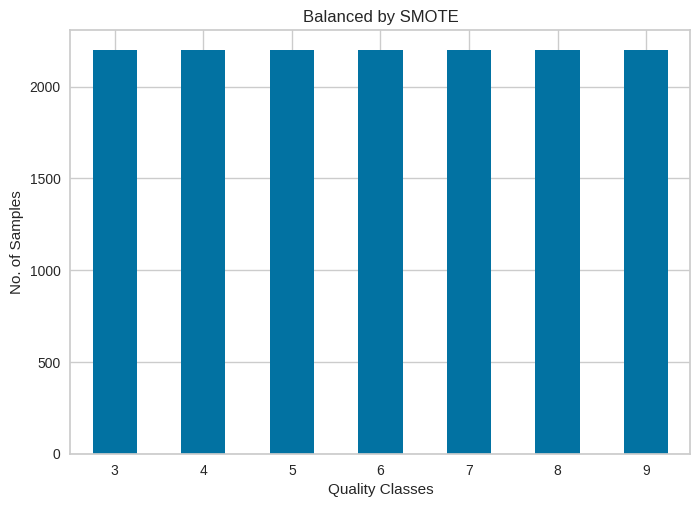

In [ ]:
quality_nums = wine_df_smoted['quality'].value_counts().sort_index().plot.bar(rot=0,
                                                                       grid=True,
                                                                       xlabel='Quality Classes',
                                                                       ylabel='No. of Samples',
                                                                       title='Balanced by SMOTE')

Text(0.5, 1.0, 'Balanced by SMOTE')

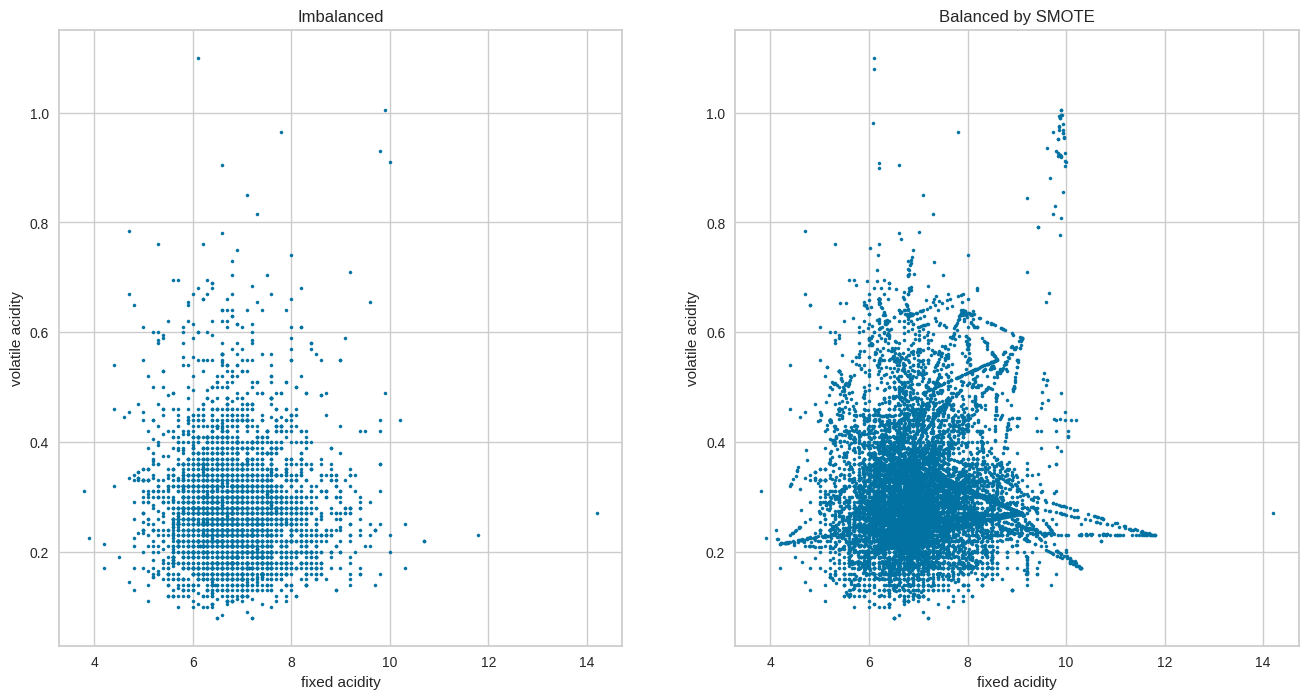

In [ ]:
# Plotting the imbalance and balanced distribution of samples
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].scatter(wine_df['fixed acidity'],
            wine_df['volatile acidity'], s=5)
axs[0].set_xlabel('fixed acidity')
axs[0].set_ylabel('volatile acidity')
axs[0].set_title('Imbalanced')

axs[1].scatter(wine_df_smoted['fixed acidity'],
            wine_df_smoted['volatile acidity'], s=5)
axs[1].set_xlabel('fixed acidity')
axs[1].set_ylabel('volatile acidity')
axs[1].set_title('Balanced by SMOTE')

From the tables and figures above, it can be seen that the minimum and maximum of the values, as well as their distributions have been maintained through the SMOTE process. From the bar plot shown above, we can see that the dataset is balanced now, where each quality class has similar number of samples. The plots above show that the distribution of samples after applying SMOTE techniques has remained unchanged, while more samples have been populated in the minority quality classes. We know that the oversampling for very rare classes such as quality classes 3 and 9 with 20 and 5 samples, respectively, makes these classes biased toward their initial samples, which may result in some unrealistic results for these classes. However, as seen from the results of the model trainings for the original dataset, the resulting ML models are not able to perform well in predicting the majority classes either, when the problem is addressed as a classification rather than regression as done by Cortez *et al* [6] and Gupta *et al* [8].

Now by having fixed the imbalance of the dataset, we can move on to the necessary preprocessing step to prepare the data for model training. In this stage, we use all the features to train the model.

In [ ]:
clf3 = setup(data=wine_df_smoted, target='quality', session_id=333)

,Description,Value
0,Session id,333
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original data shape,"(15386, 12)"
5,Transformed data shape,"(15386, 12)"
6,Transformed train set shape,"(10770, 12)"
7,Transformed test set shape,"(4616, 12)"
8,Numeric features,11
9,Preprocess,True


In [ ]:
best3 = clf3.compare_models(n_select=5, exclude=['catboost', 'gbc'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8819,0.9865,0.8819,0.8786,0.8787,0.8622,0.8628,1.5400
xgboost,Extreme Gradient Boosting,0.8742,0.9829,0.8742,0.8725,0.8728,0.8532,0.8534,2.0720
lightgbm,Light Gradient Boosting Machine,0.8730,0.9823,0.8730,0.8710,0.8714,0.8518,0.8520,10.8130
rf,Random Forest Classifier,0.8729,0.9837,0.8729,0.8693,0.8696,0.8517,0.8522,2.8460
dt,Decision Tree Classifier,0.7961,0.8811,0.7961,0.7931,0.7942,0.7621,0.7623,0.2990
knn,K Neighbors Classifier,0.7585,0.9360,0.7585,0.7400,0.7404,0.7182,0.7211,0.1990
qda,Quadratic Discriminant Analysis,0.5864,0.8926,0.5864,0.6002,0.5795,0.5174,0.5225,0.0660
lda,Linear Discriminant Analysis,0.4957,0.8316,0.4957,0.4738,0.4784,0.4117,0.4135,0.1030
nb,Naive Bayes,0.4750,0.8239,0.4750,0.4938,0.4593,0.3875,0.3947,0.1000
ridge,Ridge Classifier,0.4538,0.0000,0.4538,0.4290,0.4114,0.3627,0.3720,0.0490


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

As the results in the table above illustrate, there has been a huge improvement in various metrics for most of the candidate models, especially the top 6 models. It should be noted that the CatBoost and Gradient Boosting classifiers have been excluded because of their too long runtimes and mediocre performance.

As part of our search direction guideline, we will perform feature selection using the built-in method in **pycaret**'s **setup()** method. As suggested by Cortez *et al* [6] that on average 9 features have been used in their model training, we ask the algorithm to choose 9 best features according to its internal metrics. This can be done by

In [5]:
clf4 = setup(data=wine_df_smoted, target='quality', feature_selection=True, n_features_to_select=9, session_id=333)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001988 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 10770, number of used features: 11
[LightGBM] [Info] Start training from score -1.945632
[LightGBM] [Info] Start training from score -1.945632
[LightGBM] [Info] Start training from score -1.945632
[LightGBM] [Info] Start training from score -1.946282
[LightGBM] [Info] Start training from score -1.946282
[LightGBM] [Info] Start training from score -1.945632
[LightGBM] [Info] Start training from score -1.946282


,Description,Value
0,Session id,333
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original data shape,"(15386, 12)"
5,Transformed data shape,"(15386, 10)"
6,Transformed train set shape,"(10770, 10)"
7,Transformed test set shape,"(4616, 10)"
8,Numeric features,11
9,Preprocess,True


In [6]:
best4 = clf4.compare_models(n_select=5, exclude=['catboost', 'gbc'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8849,0.9867,0.8849,0.8817,0.8819,0.8657,0.8662,2.9760
rf,Random Forest Classifier,0.8709,0.9826,0.8709,0.8671,0.8674,0.8494,0.8500,5.4690
xgboost,Extreme Gradient Boosting,0.8674,0.9816,0.8674,0.8655,0.8659,0.8453,0.8455,3.3550
lightgbm,Light Gradient Boosting Machine,0.8648,0.9805,0.8648,0.8633,0.8635,0.8423,0.8425,13.5050
dt,Decision Tree Classifier,0.7862,0.8753,0.7862,0.7828,0.7840,0.7505,0.7507,1.5990
knn,K Neighbors Classifier,0.7471,0.9316,0.7471,0.7269,0.7284,0.7049,0.7077,1.9090
qda,Quadratic Discriminant Analysis,0.5506,0.8744,0.5506,0.5745,0.5481,0.4757,0.4815,1.9670
nb,Naive Bayes,0.4604,0.8163,0.4604,0.4777,0.4456,0.3705,0.3781,1.9600
lda,Linear Discriminant Analysis,0.4559,0.7963,0.4559,0.4298,0.4330,0.3652,0.3679,1.8670
ridge,Ridge Classifier,0.4268,0.0000,0.4268,0.4023,0.3823,0.3313,0.3412,1.6950


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

The above results show a slight improvement for the best model, which is the **Extra Tree Classifier** in both cases. There was a 0.30% increment in the performance when the feature selction is applied. One thing to notice is the runner-up model, which was the **Extreme Gradient Boosting** with 87.42% accuracy in the case where all features were used for training, whereas the **Random Forest Classifier** with 87.09% accuracy was the runner-up model when 9 features were used.

As the next step in our quest to find the best model, we will train models based on the feature selection recommended by Gupta *et al* [8]. But before that, we are interested to see the feature importance result from the previous trained models to compare with what Gupta *et al* [8] suggested. So we have

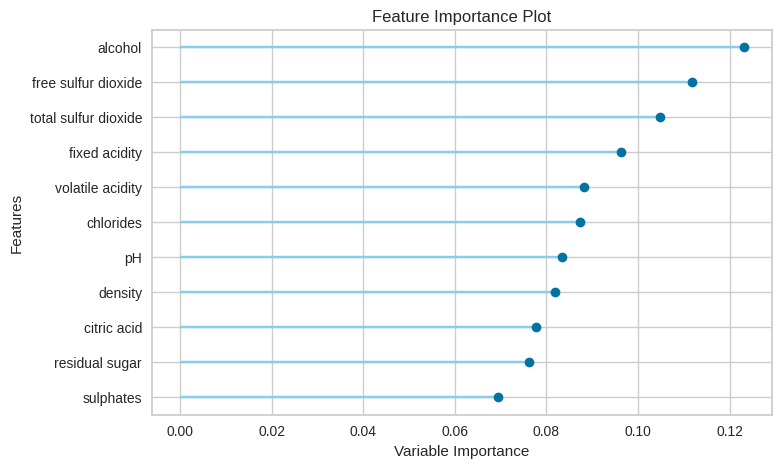

In [ ]:
clf3.plot_model(best3[0], plot='feature_all')

From the feature importance result of the **Extra Tree Classifier** we can see that the sulphates and residual sugar have the least importance comparing to other features. This is different from what Gupta *et al* [8] suggested. It is noteworthy that our approach to the problem is different from Gupta's work in that they solve a regression problem, while we directly perform a classification task. Nevertheless, it could be beneficial to explore their choice of features in our task in the hope of obtaining a better model. So in the next step, we train models with the suggested features from Gupta's work [8]. So we have

In [ ]:
clf5 = setup(data=wine_df_smoted, target='quality', ignore_features=['chlorides', 'total sulfur dioxide', 'citric acid'], session_id=333)

,Description,Value
0,Session id,333
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original data shape,"(15386, 12)"
5,Transformed data shape,"(15386, 9)"
6,Transformed train set shape,"(10770, 9)"
7,Transformed test set shape,"(4616, 9)"
8,Ignore features,3
9,Numeric features,8


In [ ]:
best5 = clf5.compare_models(n_select=5, exclude=['catboost', 'gbc'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8610,0.9823,0.8610,0.8570,0.8572,0.8378,0.8385,0.8750
rf,Random Forest Classifier,0.8517,0.9793,0.8517,0.8473,0.8480,0.8270,0.8276,2.2320
lightgbm,Light Gradient Boosting Machine,0.8498,0.9778,0.8498,0.8477,0.8481,0.8247,0.8250,8.3770
xgboost,Extreme Gradient Boosting,0.8487,0.9778,0.8487,0.8468,0.8471,0.8234,0.8237,2.4710
dt,Decision Tree Classifier,0.7785,0.8708,0.7785,0.7754,0.7765,0.7415,0.7417,0.1130
knn,K Neighbors Classifier,0.6992,0.9132,0.6992,0.6807,0.6848,0.6490,0.6508,0.1070
qda,Quadratic Discriminant Analysis,0.5494,0.8803,0.5494,0.5581,0.5410,0.4743,0.4783,0.0890
lda,Linear Discriminant Analysis,0.4899,0.8262,0.4899,0.4669,0.4718,0.4049,0.4067,0.0560
lr,Logistic Regression,0.4649,0.8114,0.4649,0.4444,0.4481,0.3757,0.3775,3.7070
nb,Naive Bayes,0.4558,0.8070,0.4558,0.4454,0.4285,0.3651,0.3710,0.0540


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

From the results presented in the table above, there is a drop of performance with the suggested features in Gupta's work for our classification approach. It should be noted that all the best models obtained here outperform the models of Cotez *et al* [6] and Gupta *et al* [8].

According to our search guideline, there is a discrepancy between the scales of some features, which encourages us to train models with normalization of data to clean out the drop of performance due to different scales, if there is any. To this end, we first train models with normalization without any feature selection, and once with feature selection. So for the first case we have

In [ ]:
clf6 = setup(data=wine_df_smoted, target='quality', normalize=True, session_id=333)

,Description,Value
0,Session id,333
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original data shape,"(15386, 12)"
5,Transformed data shape,"(15386, 12)"
6,Transformed train set shape,"(10770, 12)"
7,Transformed test set shape,"(4616, 12)"
8,Numeric features,11
9,Preprocess,True


In [ ]:
best6 = clf6.compare_models(n_select=5, exclude=['catboost', 'gbc'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8819,0.9865,0.8819,0.8786,0.8788,0.8622,0.8627,1.4080
xgboost,Extreme Gradient Boosting,0.8742,0.9829,0.8742,0.8725,0.8728,0.8532,0.8534,2.0010
rf,Random Forest Classifier,0.8721,0.9838,0.8721,0.8685,0.8688,0.8508,0.8514,3.0800
lightgbm,Light Gradient Boosting Machine,0.8720,0.9824,0.8720,0.8703,0.8705,0.8506,0.8508,11.0560
catboost,CatBoost Classifier,0.8679,0.9805,0.8679,0.8641,0.8651,0.8459,0.8462,32.2120
knn,K Neighbors Classifier,0.7961,0.9504,0.7961,0.7812,0.7824,0.7621,0.7644,0.2010
dt,Decision Tree Classifier,0.7959,0.8809,0.7959,0.7929,0.7940,0.7619,0.7620,0.1540
qda,Quadratic Discriminant Analysis,0.5864,0.8926,0.5864,0.6003,0.5796,0.5175,0.5226,0.1100
lr,Logistic Regression,0.5220,0.8440,0.5220,0.5060,0.5112,0.4423,0.4433,0.6960
lda,Linear Discriminant Analysis,0.4957,0.8316,0.4957,0.4738,0.4784,0.4117,0.4135,0.0710


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

Comparing the best model's performance **best6** as the result of normalization with the best model without normalization **best3** we see no noticeable change in the various metrics of the model. Now, we try nomalization with the automatic feature selection by **pycaret** to see how normalization would affect the best model's performance. So we have

In [ ]:
clf7 = setup(data=wine_df_smoted, target='quality', feature_selection=True, n_features_to_select=9, normalize=True, session_id=333)

,Description,Value
0,Session id,333
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original data shape,"(15386, 12)"
5,Transformed data shape,"(15386, 10)"
6,Transformed train set shape,"(10770, 10)"
7,Transformed test set shape,"(4616, 10)"
8,Numeric features,11
9,Preprocess,True


In [ ]:
best7 = clf7.compare_models(n_select=5, exclude=['catboost', 'gbc'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8845,0.9866,0.8845,0.8813,0.8813,0.8652,0.8658,2.8360
rf,Random Forest Classifier,0.8697,0.9827,0.8697,0.8659,0.8663,0.8480,0.8486,4.6760
xgboost,Extreme Gradient Boosting,0.8691,0.9818,0.8691,0.8671,0.8675,0.8473,0.8475,3.4120
lightgbm,Light Gradient Boosting Machine,0.8673,0.9808,0.8673,0.8657,0.8659,0.8452,0.8454,11.3770
dt,Decision Tree Classifier,0.7875,0.8760,0.7875,0.7842,0.7854,0.7520,0.7522,2.1180
knn,K Neighbors Classifier,0.7863,0.9448,0.7863,0.7710,0.7719,0.7506,0.7530,2.0110
qda,Quadratic Discriminant Analysis,0.5513,0.8746,0.5513,0.5730,0.5479,0.4765,0.4822,1.9570
lr,Logistic Regression,0.4825,0.8185,0.4825,0.4608,0.4668,0.3963,0.3976,2.6160
nb,Naive Bayes,0.4616,0.8162,0.4616,0.4797,0.4470,0.3718,0.3795,1.9280
lda,Linear Discriminant Analysis,0.4553,0.7958,0.4553,0.4287,0.4322,0.3646,0.3672,2.0500


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

As seen in the table above and comparing to the model **best4** performance, there is a negligible negative effect on the best model performance due to normalization, which verifies the previous results without feature selection. It can be concluded that the scales of the feature values are not vastly different and do not have a negative effect on the model's performance.

Now that all the search directions have been visited and examined, it would be insightful to take a look at the best two models further, which are SMOTE'd model without feature selection **best3** and SMOTE'd with automatic feature selection model **best4**. To this end, we will use the analysis tools of the **pycaret** module to view the resulting confusion matrices of these two models. So we get

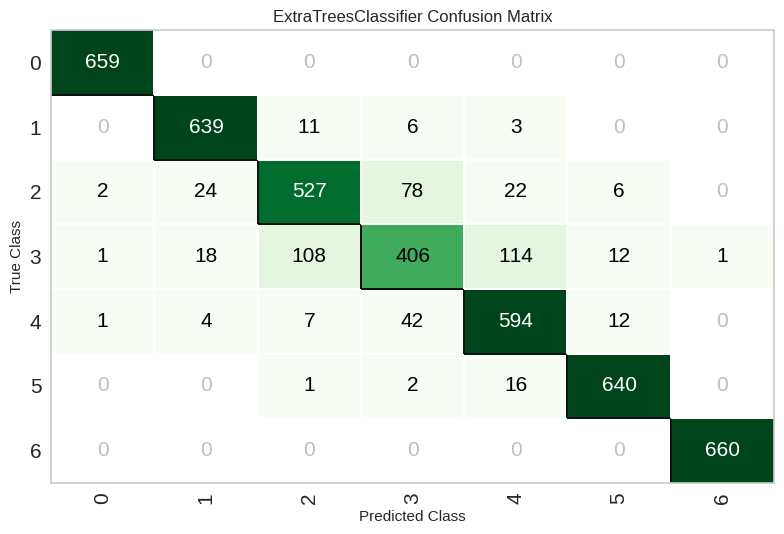

In [ ]:
best3_et = best3[0]
clf3.plot_model(best3_et, plot='confusion_matrix')

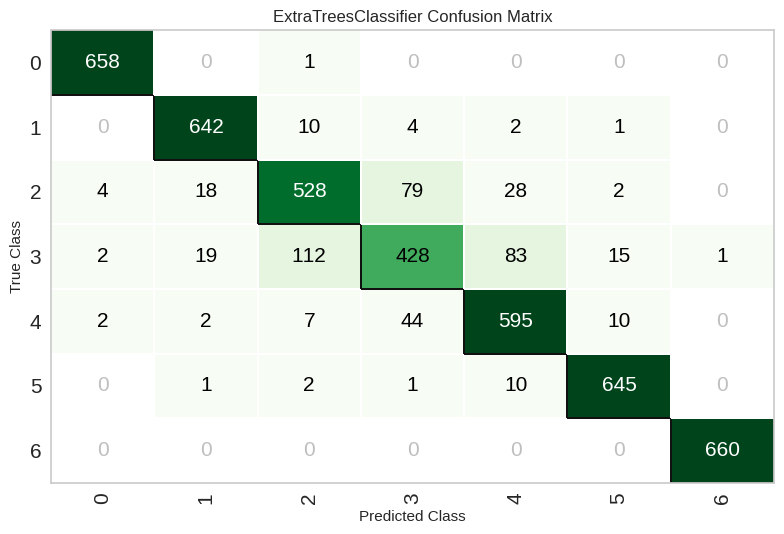

In [ ]:
best4_et = best4[0]
clf4.plot_model(best4_et, plot='confusion_matrix')

As we compare the two confusion matrices, we see that the model **best4** with automatic feature selection performs noticeably better than model **best3** without feature selection. Therefore, we conclude that the model **best4** with feature selection is the best model. As a result, we move forward to do a list of optimzations to see if the model's performance can be enhanced or not.

# Model Optimization

In this section, we will perform a set of optimization procedures to improve the best model selected in the previous section. From the list of all optimization options, the first step would be to tune the best model in **best4** selected in the previous section, which is the **Extra Trees Classifier** by

In [ ]:
best4_et_tuned = clf4.tune_model(best4_et, n_iter=50, choose_better=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7447,0.9519,0.7447,0.7318,0.7362,0.7021,0.7028
1,0.7521,0.9514,0.7521,0.7423,0.7428,0.7108,0.7125
2,0.7809,0.9546,0.7809,0.7682,0.7703,0.7444,0.7458
3,0.7669,0.9532,0.7669,0.7627,0.7613,0.7281,0.7295
4,0.7493,0.9487,0.7493,0.7405,0.7420,0.7075,0.7087
5,0.7874,0.9579,0.7874,0.7792,0.7790,0.7519,0.7534
6,0.7642,0.9530,0.7642,0.7507,0.7504,0.7248,0.7271
7,0.7456,0.9518,0.7456,0.7391,0.7366,0.7032,0.7053
8,0.7604,0.9531,0.7604,0.7584,0.7547,0.7205,0.7224


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits


According to the tuning result, the original model outperforms the best tuned model; therefore, we will stick with the original model for further optimizations. We have tried different number of iterations **n_iter** for tuning purposes, where as we increase this value, the performance of the model improves; however, there is not much improvement after some values. The above results is for **n_iter=50**.

The next step in optimization would be replicating the **Extra Trees Classifier** model in **best4** as new estimators and making an ensemble model using that. It can be done as

In [ ]:
best4_et_ensembled = clf4.ensemble_model(best4_et, n_estimators=50, choose_better=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8737,0.9844,0.8737,0.8690,0.8683,0.8527,0.8537
1,0.8691,0.9839,0.8691,0.8651,0.8640,0.8473,0.8484
2,0.8849,0.9855,0.8849,0.8804,0.8810,0.8657,0.8662
3,0.8784,0.9872,0.8784,0.8758,0.8750,0.8581,0.8589
4,0.8812,0.9852,0.8812,0.8775,0.8783,0.8613,0.8617
5,0.8858,0.9881,0.8858,0.8845,0.8803,0.8668,0.8684
6,0.8821,0.9871,0.8821,0.8799,0.8782,0.8624,0.8633
7,0.8756,0.9860,0.8756,0.8724,0.8715,0.8548,0.8557
8,0.8747,0.9853,0.8747,0.8716,0.8717,0.8538,0.8543


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In the above table, we ensembled 50 **Extra Trees Classifier** as trained in **best4**. As seen in the table above, the overall performance is less than 1% worse than the original model. Therefore, we continue the optimization procedure with the original model.

Another approach in optimization of the model would be blending a given set of ML models. For this purpose, we have picked the top 5 models trained previously through the **compare_models()** method to be fed into the **blend_models()** function. The blending of models can be achieved by

In [ ]:
best4_blended = clf4.blend_models(best4, choose_better=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8774,0.9829,0.8774,0.8746,0.8755,0.8570,0.8572
1,0.8598,0.9818,0.8598,0.8555,0.8565,0.8364,0.8368
2,0.8700,0.9828,0.8700,0.8665,0.8677,0.8483,0.8485
3,0.8886,0.9861,0.8886,0.8876,0.8869,0.8700,0.8705
4,0.8728,0.9821,0.8728,0.8686,0.8701,0.8516,0.8518
5,0.8812,0.9874,0.8812,0.8779,0.8782,0.8613,0.8618
6,0.8709,0.9848,0.8709,0.8677,0.8685,0.8494,0.8497
7,0.8849,0.9854,0.8849,0.8828,0.8812,0.8657,0.8665
8,0.8830,0.9847,0.8830,0.8812,0.8813,0.8635,0.8638


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

As seen in the table above, the mean cross validation accuracy is 87.52%, which is slightly less the **Extra Trees Classifier**. Therefore, this model still remains the best trained model for now. However, it would be beneficial to look at the resulting confusion matrix to check how different classes are predicted based on this model.

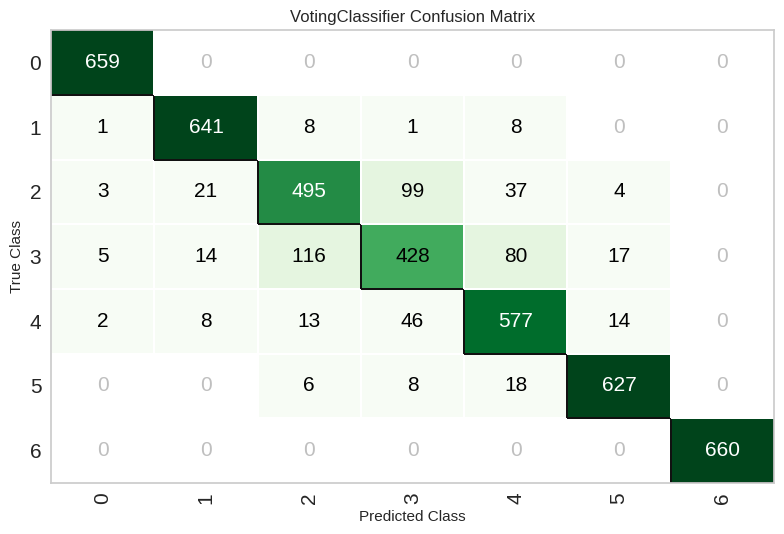

In [ ]:
clf4.plot_model(best4_blended, plot='confusion_matrix')

Although there is not a huge drop in the accuracy of the blended model, we see from the above confusion matrix that the number correct predictions has dropped noticeably, especially for quality classes 5, 7, and 8.

Ultimately, the stacking will be the last technique to enhance our final model. The **stack_models()** method takes in a set of ML models and stacks them up for a better estimating model. Again, the top 5 models in **best4** are fed into the function as

In [ ]:
best4_stacked = clf4.stack_models(best4)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8802,0.9875,0.8802,0.8796,0.8797,0.8603,0.8603
1,0.8839,0.9867,0.8839,0.8860,0.8843,0.8646,0.8648
2,0.8895,0.9880,0.8895,0.8890,0.8890,0.8711,0.8712
3,0.9025,0.9902,0.9025,0.9022,0.9020,0.8863,0.8864
4,0.8877,0.9878,0.8877,0.8876,0.8875,0.8689,0.8690
5,0.9053,0.9908,0.9053,0.9057,0.9054,0.8895,0.8895
6,0.8904,0.9897,0.8904,0.8898,0.8900,0.8722,0.8722
7,0.8969,0.9883,0.8969,0.8968,0.8961,0.8798,0.8800
8,0.8942,0.9879,0.8942,0.8950,0.8943,0.8765,0.8766


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

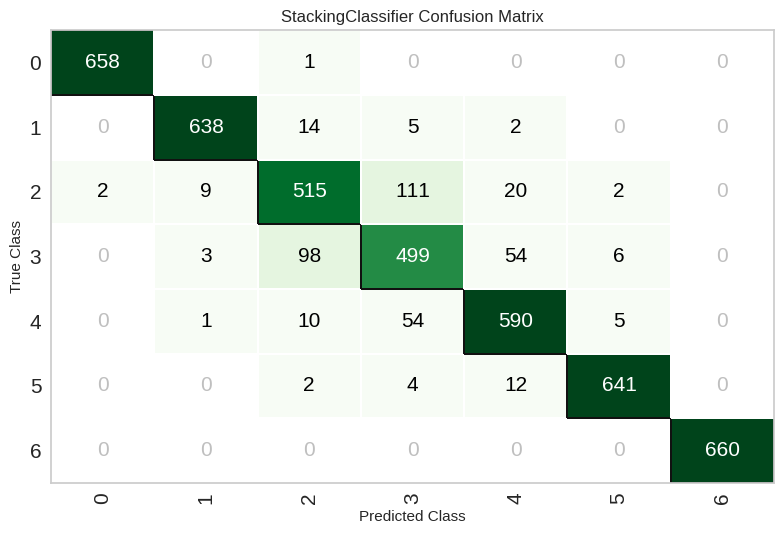

In [ ]:
clf4.plot_model(best4_stacked, plot='confusion_matrix')

As can be seen from the results above, there is a significant improvement in the performance of the stacked model using the trained models of **best4**. Fortunately, the optimization process resulted in a better model comparing to the trained one. Consequently, the rest of this project will analyze the model's performance and discuss the results obtained above.

# Model Analysis

In this section, the model obtained from the training, selection, and optimization processes will be evaluated using the holdout set (test set) against the performance metrics central in classification problems. The most important set of metrics are those of accuracy, precision, recall, and F1. According to the previous section, the best model has found to be the **best4_stacked** model, comprised from the top five models in **best4**. The confusion matrix of the stacked model and the extra trees classifier, which were the best 2 models are presented below for easy reference.

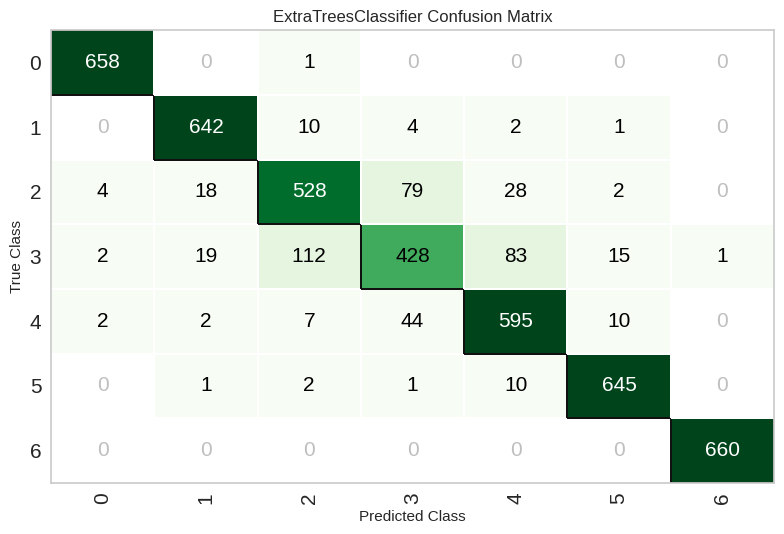

In [ ]:
clf4.plot_model(best4_et, plot='confusion_matrix')

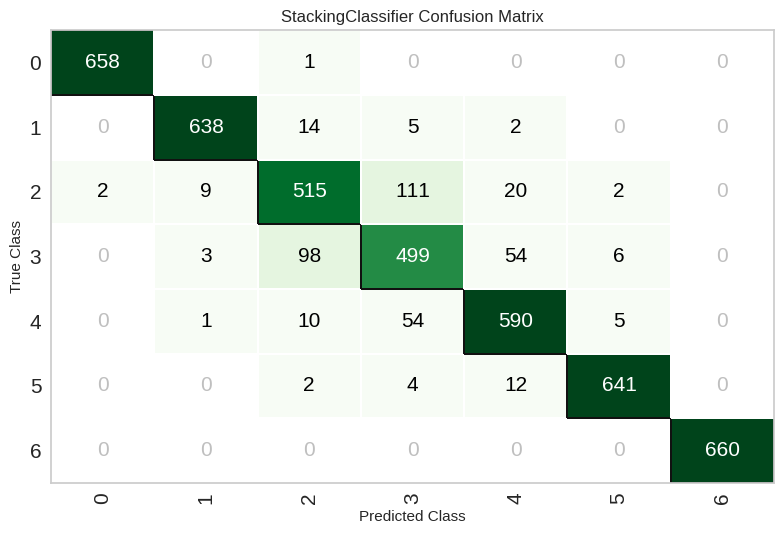

In [ ]:
clf4.plot_model(best4_stacked, plot='confusion_matrix')

As mentioned earlier, the SMOTE technique used for balancing purposes can increase the chance of overfitting because it had to generate many samples for extreme minority classes, such as quality classes 3 and 9, given a very few number of samples. It can be seen from the confusion matrices that the models perform better for the extreme quality classes (3 and 9). This could be a sign that the model might be overfitting these data points because of the oversampling techniques. Although this might not be desirable in some cases, it is in our application since the minority classes were extremely rare, some of it with less than 20 samples, and the overall prediction performance increased for the majority classes to over 80% as well, which is a desirable event.

Comparing the stacked model's and the extra tree classifier's confusion matrices, we can see that the prediction of the extreme quality classes are more distributed over other dataset classes, which shows a less overfitting if there is any. In addition, the number of correct predictions of the original majority quality classes is higher for the stacked model, which is very desirable. As a result, we can conclude that the stacked model (**best4_stacked**) is a better model. According to the confusion matrix, the generalization primary metrics are:

1.   Mean Accuracy = 91%
2.   Mean Precision = 91%
3.   Mean Recall = 91%

according to the classification report presented below based on the holdout set (test set).

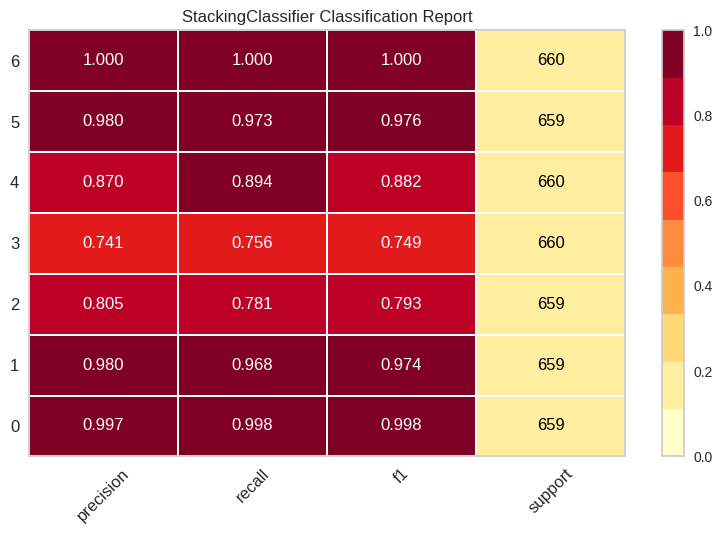

In [ ]:
clf4.plot_model(best4_stacked, plot='class_report')

Another useful metric to evaluate the classfier is the Area-Under-the-Curve (AUC) of the Receiver Operating Curve (ROC). As closer the AUC value to 1, the better classifying ML model. The ROC curve can be plotted by

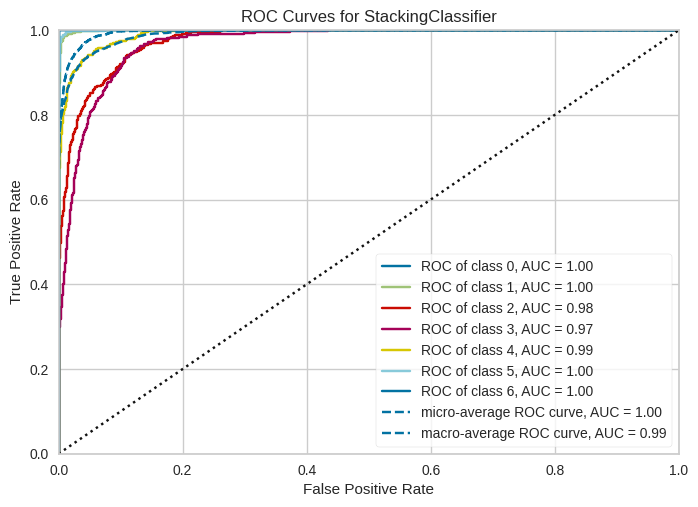

In [ ]:
clf4.plot_model(best4_stacked, plot='auc')

The ROC graph plots the True Positive Rate (Recall) versus the False Positive Rate (Specificity=1-sensitivity), where sensitivity is the True Negative Rate. The ROC curve demonstrates the model's performance in terms of detecting the positive class samples as much as possible (Recall) and not predicting the negative class samples as positive (false positives). Therefore, an ideal ROC curve is the one that is populated toward the top left corner whose AUC is as close as to 1. As seen in the above graph, all the classes' ROC curves are highly pulled toward the top left corner and away from the random classifier. The mean AUC value of the **best4_stacked** model is over 0.98, which is desirable. Apart from the ROC curve, the precision-recall curve is another useful metric that evaluates the model in terms of detecting all the positives, while not misclassifying the negatives as positives. Since xgboost is one of the contributing models in the stacked model, the precision-recall curve cannot be drawn using **pycaret**. Nevertheless, it is fine as we still have the classification report to show the corresponding values. However, for the sake of completeness, we plot the precision-recall curve of the **Extra Trees Classifier** in **best4**, which is the best model among the top 5 models contributing in forming the final stacked model. So we have

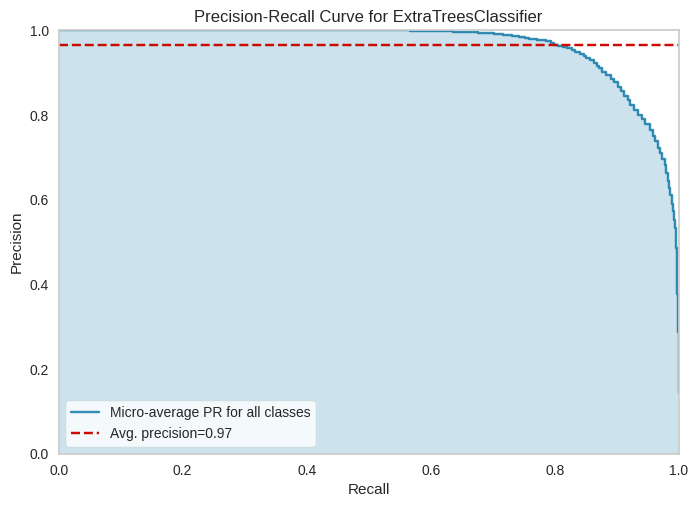

In [10]:
best4_et = best4[0]
clf4.plot_model(best4_et, plot='pr')

The ideal shape for the precision-recall curve is to have a great tendency toward the top-right corner of the plot, which is the curve above resulted from the best model trained on the wine dataset. Such behavior is translated in having a high precision with a high recall for the model, as both values are close to 1.

Ultimately, there is an interesting observation that is worthwhile to discuss as a result of this project. As seen in the white wine dataset, the quality rating of wine samples ranges from 0 to 10, where the quality classes 0, 1, 2, and 10 are completely empty. From the rating structure, it is evident that the neighbor quality classes are related to each other, meaning that two nearby values of the quality classes result in closer quality of wine samples. For instance, two wine samples with quality of 3 and 4 have a more similar quality rather than two wine samples with the quality classes of 3 and 9. Hence, it would be a an interesting practice to combine these detailed quality classes into larger quality classes. Under this practice, we could combine the 3-4, 5-7, and 8-9 quality classes into low, normal, and high quality classes, respectively. This practice is supported by the results obtained from the training, selection, optimization, and prediction of the final model. There are also some benefits to the ML model training process. The first one is, as we see in the dataset, almost all the wine samples range from quality classes 4 to 8, where wine samples with extreme qualities are rare at best; therefore, we could take advantage of the existing wine samples in the common qualities to gain an understanding of their rare neighbors, train a better model, and predict with a higher performance. Moreover, it is well understood in that the reviewers' ratings of wine qualities are very subjective and dependent on many external factors as well, which makes it extremely difficult to differentiate between a wine sample of quality 5 and 6; hence, a group rating would be more practical. However, after the first step which could be a group rating, we could go further to detailed rating of the quality classes with a reasonable number of wine samples, since, after all, a too few wine samples for a quality class would be of no use to help an ML model learn and predict.

Consequently, according to the above reasoning, we can group the quality classes in larger quality classes to form the low, normal and high quality classes. In this manner, the performance metrics of the model will increase significantly across all quality classes. Since the extreme quality classes potentially have unrealistically over-sampled samples, we only consider the majority class to evaluate the model's performance imorovement. By examining the confusion matrix presented above, we can see that grouping the quality classes 5, 6, and 7 (2,3, and 4 in the confusion matrix) into the normal quality class with the total number of wine samples of 1979 in the test set will result in the model making 1951 correct predictions, which renders the following performance metrix:

1.  Recall = 98.5%
2.  Precision = 97.9%

The accuracy of the model considering all the grouped quality classes will be 98.5%. It should be noted once again that the over-sampling of the extremely rare classes makes the overall accuracy inflated, although the recall and precision are better metrics to evaluate the model's performance in predicting the majority class entries.

# Conclusions and Suggestions For Future Work

In this project, the white wine dataset, generated from the physicochemical and sensory analyses of wine samples from the *Vinho Verde*, the product of the Mihno region in Portugal, has been studied. The purpose of the project was to design a machine learning model that can predict the quality class of the wine samples using their 11 physicochemical properties. This project was structured to find the best ML model given the imbalanced dataset after performing the necessary preprocessing. The final model did not have an appealing performance even after applying some feature selection techniques according to the previous works' suggestions. Therefore, it forced us to apply the SMOTE over-sampling technique to overcome the imbalance issues of the dataset. Fortunately, this resulted in a significant performance boost of various candidate models, where the extra trees classifier performed the best. With the major performance improvement, we extended our efforts to apply some automatic and prescribed feature selections, as well as normalization of the feature scales, in the hope of an extra performance boost. Subsequently, the extra trees classifier method with an automatic feature selection turned out to be the best-performing model according to performance metrics such as accuracy, precision, and recall. Afterward, the tuning process, the ensembling techniques using 50 extra trees classifier estimators, the blending of the top 5 ML models, and the stacking of the top 5 models were applied to the best model obtained previously to enhance the performance of the best model. That resulted in the stacked model becoming the best final model with the mean accuracy, mean precision, and mean recall of 91%, 91%, and 91%, respectively. Compared to previous works, this project was able to achieve such high performance metrics by directly classifying the quality classes rather than applying regression to the classes and classifying them using the specified thresholds for the absolute errors between the predicted values and the corresponding quality class.

As per the suggestions for future work, more data points should be added to the dataset as it suffers from the lack of wine samples for extreme quality classes, where the quality classes of 0, 1, 2, and 10 are empty, while quality classes 3 and 9 have 20 and 5 samples, respectively, which makes the learning and predicting processes impossible, considering these classes in the model. Another approach could be to disregard the classes with a number of samples less than a minimum threshold to guarantee a better performing model for the remaining quality classes. This could help the models consider only the quality classes with enough samples to convey enough information to them to learn. In addition, at least more samples can contribute to a well-distributed over-sampled dataset to overcome the imbalance issues. As seen in this project, the variety of a quality class over-sampled from only 5 samples would be too narrow, resulting in unrealistic data points for the corresponding quality class. Moreover, some under-sampling could be applied to the majority classes while the over-sampling is performed on the minority classes to maintain a well-distributed dataset.

# References

1. Sun, L. X., Danzer, K., & Thiel, G. (1997). Classification of wine samples by means of artificial neural networks and discrimination analytical methods. Fresenius' journal of analytical chemistry, 359, 143-149.

2. Vlassides, S., Ferrier, J. G., & Block, D. E. (2001). Using historical data for bioprocess optimization: modeling wine characteristics using artificial neural networks and archived process information. Biotechnology and Bioengineering, 73(1), 55-68.

3. Yu, H., Lin, H., Xu, H., Ying, Y., Li, B., & Pan, X. (2008). Prediction of enological parameters and discrimination of rice wine age using least-squares support vector machines and near infrared spectroscopy. Journal of agricultural and food chemistry, 56(2), 307-313.

4. Beltrán, N. H., Duarte-Mermoud, M. A., Vicencio, V. A. S., Salah, S. A., & Bustos, M. A. (2008). Chilean wine classification using volatile organic compounds data obtained with a fast GC analyzer. IEEE Transactions on Instrumentation and Measurement, 57(11), 2421-2436.

5. S. Ebeler. Flavor Chemistry - Thirty Years of Progress, chapter Linking
flavour chemistry to sensory analysis of wine, pages 409–422. Kluwer Academic
Publishers, 1999.

6. Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Modeling wine preferences by data mining from physicochemical properties. Decision support systems, 47(4), 547-553.

7. CVRVV. Portuguese Wine - Vinho Verde. Comiss˜ao de Viticultura da Regi˜ao
dos Vinhos Verdes (CVRVV), http://www.vinhoverde.pt, July 2008.

8. Gupta, Y. (2018). Selection of important features and predicting wine quality using machine learning techniques. Procedia Computer Science, 125, 305-312.

9. Hu, G., Xi, T., Mohammed, F., & Miao, H. (2016, March). Classification of wine quality with imbalanced data. In 2016 IEEE International Conference on Industrial Technology (ICIT) (pp. 1712-1217). IEEE.